In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
%matplotlib inline

In [2]:
train_X = np.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
                         7.042,10.791,5.313,7.997,5.654,9.27,3.1])
train_Y = np.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
                         2.827,3.465,1.65,2.904,2.42,2.94,1.3])
n_samples = train_X.shape[0]

In [3]:
X = tf.placeholder('float')
Y = tf.placeholder('float')
W = tf.Variable(np.random.randn(), name='weight')
b = tf.Variable(np.random.randn(), name='bias')

In [4]:
activation = tf.add(tf.multiply(X, W), b)

In [5]:
cost = tf.reduce_sum(tf.pow(activation-Y, 2.))/(2*n_samples)

In [6]:
optimizer = tf.train.GradientDescentOptimizer(0.01).minimize(cost)

In [7]:
init = tf.global_variables_initializer()

('Epoch:', '0050', 'cost=', '0.297238231', 'W=', 0.5119133, 'b=', -1.0856432)
('Epoch:', '0100', 'cost=', '0.271797031', 'W=', 0.49631187, 'b=', -0.97340763)
('Epoch:', '0150', 'cost=', '0.249293551', 'W=', 0.48163855, 'b=', -0.86784828)
('Epoch:', '0200', 'cost=', '0.229388207', 'W=', 0.46783757, 'b=', -0.76856548)
('Epoch:', '0250', 'cost=', '0.211781532', 'W=', 0.45485762, 'b=', -0.67518848)
('Epoch:', '0300', 'cost=', '0.196207821', 'W=', 0.44264951, 'b=', -0.58736455)
('Epoch:', '0350', 'cost=', '0.182432786', 'W=', 0.43116775, 'b=', -0.50476515)
('Epoch:', '0400', 'cost=', '0.170248300', 'W=', 0.42036861, 'b=', -0.42707732)
('Epoch:', '0450', 'cost=', '0.159471020', 'W=', 0.41021186, 'b=', -0.35401016)
('Epoch:', '0500', 'cost=', '0.149938360', 'W=', 0.40065911, 'b=', -0.28528833)
('Epoch:', '0550', 'cost=', '0.141506702', 'W=', 0.39167452, 'b=', -0.22065385)
('Epoch:', '0600', 'cost=', '0.134048909', 'W=', 0.38322431, 'b=', -0.15986355)
('Epoch:', '0650', 'cost=', '0.127452552',

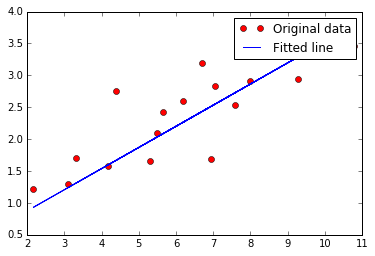

In [8]:
display_step = 50
with tf.Session() as sess:
    sess.run(init)

    # Fit all training data
    for epoch in range(1000):
        for (x, y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X: x, Y: y})

        # Display logs per epoch step
        if (epoch+1) % display_step == 0:
            c = sess.run(cost, feed_dict={X: train_X, Y:train_Y})
            print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), \
                "W=", sess.run(W), "b=", sess.run(b))

    print("Optimization Finished!")
    training_cost = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
    print("Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n')

    # Graphic display
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()